In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dsa_train=pd.read_csv('train.csv')
dsa_test=pd.read_csv('test.csv')

Some feature engineering below (for simplicity I used 3 features only: Class, Sex and Age):

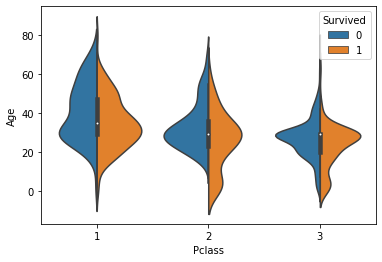

In [ ]:
sexos={"male":0, "female":1}
dsa_train.Sex=[sexos[item] for item in dsa_train.Sex]
dsa_test.Sex=[sexos[item] for item in dsa_test.Sex]

dsa_train.Age.fillna(dsa_train.Age.mean(), inplace=True)
dsa_test.Age.fillna(dsa_test.Age.mean(), inplace=True)

dsa_train.Age=dsa_train.Age.astype(int)
dsa_test.Age=dsa_test.Age.astype(int)

#A wild plot has appeared, just for the heck of it
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=dsa_train, split=True)

#Ages grouped
data = [dsa_train, dsa_test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [ ]:
#probabilities of the features
    
Class_counts=dsa_train['Pclass'].value_counts()  
p_Class=Class_counts/len(dsa_train)

Sex_counts=dsa_train['Sex'].value_counts()
p_Sex=Sex_counts/len(dsa_train)

Age_counts=dsa_train['Age'].value_counts()
p_Age=Age_counts/len(dsa_train)

# Survival and Death probabilities
y_counts=dsa_train['Survived'].value_counts()
p_y=y_counts/len(dsa_train)

dsa_survived=dsa_train.loc[dsa_train['Survived'] == 1]
dsa_died=dsa_train.loc[dsa_train['Survived'] == 0]

# Conditional probabilities
#class/survived
class_survived_counts=dsa_survived['Pclass'].value_counts()  
p_class_survived=class_survived_counts/len(dsa_survived)

# class/died
class_died_counts=dsa_died['Pclass'].value_counts()  
p_class_died=class_died_counts/len(dsa_died)

#sex/survived
sex_survived_counts=dsa_survived['Sex'].value_counts()  
p_sex_survived=sex_survived_counts/len(dsa_survived)

sex_died_counts=dsa_died['Sex'].value_counts()  
p_sex_died=sex_died_counts/len(dsa_died)

#Age/survived
age_survived_counts=dsa_survived['Age'].value_counts()  
p_age_survived=age_survived_counts/len(dsa_survived)

age_died_counts=dsa_died['Age'].value_counts()  
p_age_died=age_died_counts/len(dsa_died)

Bayes function defined below:

In [ ]:
def Bayes(py, px1y, px2y, px3y, px1, px2, px3):
    numerator=px1y*px2y*px3y*py
    denominator=px1*px2*px3
    p=numerator/denominator
    return p

The probabilities of survival for each passenger calculated below:

In [ ]:
result_array=[]

for i in range(0,418):
    feature_class=dsa_test.iloc[i]['Pclass']
    feature_sex=dsa_test.iloc[i]['Sex']
    feature_age=dsa_test.iloc[i]['Age']
    
    P_Y1=Bayes(p_y[1], p_class_survived[feature_class], p_sex_survived[feature_sex], p_age_survived[feature_age], p_Class[feature_class], p_Sex[feature_sex], p_Age[feature_age])
    P_Y0=Bayes(p_y[0], p_class_died[feature_class], p_sex_died[feature_sex], p_age_died[feature_age], p_Class[feature_class], p_Sex[feature_sex], p_Age[feature_age])
    
    if P_Y0 > P_Y1:
        result=0
    else:
        result=1
        
    result_array.append(result)


output = pd.DataFrame({'PassengerId': dsa_test.PassengerId,'Survived': result_array})
output.to_csv('submission.csv', index=False)